# Microfinance Loan 

In [1]:
# Importing all libraries that needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# # Read from csv data source
# df = pd.read_csv('Microfinance.csv', encoding="ISO-8859-1")
# df.sample(10)

# Read from Excel data source
dataset = pd.read_excel('Loan-Txn-ML-dataset.xlsx')
dataset


df = pd.DataFrame(dataset)
df.sample(10)

,LoanID,CustomerID,DOB,Occupation,Home Ownership,Township,Region,Issue Date,Expected End Date,Days Overdue,Term Months,Current Term Months,Installment,Outstanding,Loan Status,Loan Amount,Funded Amount,Interest Rate,LoanType,Purpose
84,ZL1379,CF0082,1995-10-13,Teacher,Own,Seikkyi Kanaungto,Yangon,1/13/2023,2025-07-13,47,30,31,315000,315000,Late (31-90 days),3900000,2900000,0.11,Agricultural Loan,Agriculture
1735,ZL0151,CF7774,1972-02-26,Government Employee,Own,Latha,Yangon,2024-06-26 00:00:00,2025-08-26,3,14,14,270000,270000,In Grace Period,3300000,1200000,0.12,SME Loan,Business
1637,ZL0410,CF6786,1963-07-01,Business Owner,Own,Bago,Bago,2023-01-12 00:00:00,2025-05-12,109,28,31,315000,945000,Charged Off,3900000,900000,0.11,Education Loan,Tution Fee
872,ZL1797,CF3330,1977-08-22,Teacher,Own,Ngazun,Mandalay,12/21/2022,2025-03-21,161,27,32,36000,180000,Charged Off,500000,400000,0.20,Agricultural Loan,Agriculture
589,ZL1447,CF2476,1994-02-16,Farmer,Own,Lawksawk,Shan,1/10/2025,2027-07-10,-680,30,7,135000,3105000,Current,1900000,900000,0.15,Agricultural Loan,Agriculture
399,ZL0956,CF1897,1972-11-22,Doctor,Own,Hkamti,Sagaing,2023-05-30 00:00:00,2025-07-30,30,26,26,180000,180000,Late (16-30 days),2300000,1100000,0.14,Personal Loan,Vacation
770,ZL1659,CF3044,1987-07-11,Farmer,Rent,Budalin,Sagaing,9/15/2023,2026-01-15,-139,28,23,270000,1350000,Current,3300000,1000000,0.12,Agricultural Loan,Agriculture
1349,ZL1288,CF4807,1982-10-01,Nurse,Own,Ngape,Magway,8/10/2025,2028-03-10,-924,31,0,270000,8370000,Current,3400000,1800000,0.12,Agricultural Loan,Agriculture
361,ZL1421,CF1782,1963-06-17,Business Owner,Own,Lashio,Shan,8/30/2023,2026-04-30,-244,32,23,135000,1215000,Current,2000000,800000,0.14,Agricultural Loan,Agriculture
167,ZL1603,CF1167,1997-02-07,Business Owner,Family,Pyinoolwin,Mandalay,2/9/2024,2026-05-09,-253,27,18,225000,2025000,Current,2700000,1800000,0.13,Agricultural Loan,Agriculture


# Univariate Analysis (Categorical Ordered)

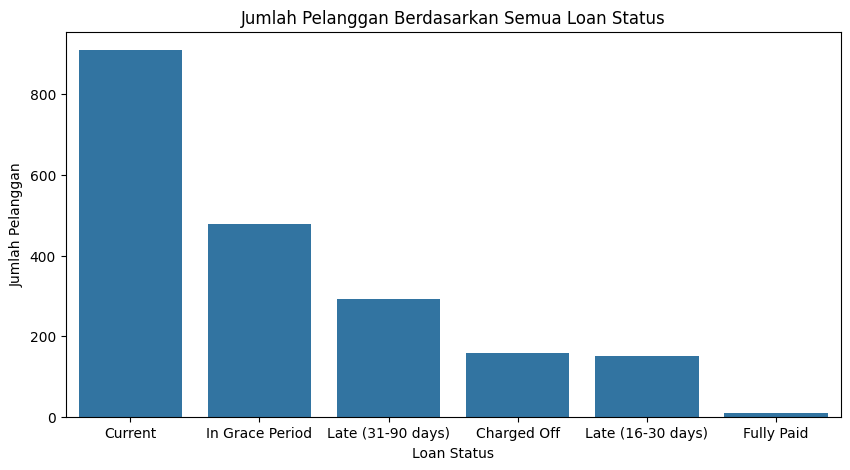

In [4]:
# 1. Tampilkan Bar Chart untuk Semua Status
all_status_counts = df['Loan Status'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=all_status_counts.index, y=all_status_counts.values)
plt.title('Jumlah Pelanggan Berdasarkan Semua Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Jumlah Pelanggan')
plt.show()

In [9]:
# 2. Ambil Region Tertinggi berdasarkan status yang dipilih
selected_status = ['Current', 'Fully Paid', 'In Grace Period']
top_regions = df[df['Loan Status'].isin(selected_status)]['Region'].value_counts()
top_regions

Region
Magway        326
Mandalay      274
Bago          248
Yangon        247
Sagaing       184
Shan          103
Ayeyarwady     10
Naypyidaw       5
Name: count, dtype: int64

# Bivariate Analysis (Categorical-Categorical)

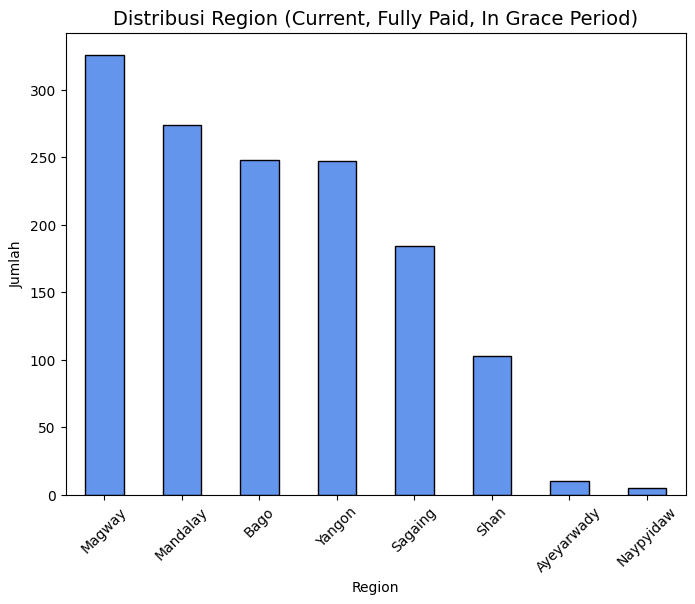

In [6]:
# Visualisasi Top Regions berdasarkan Loan Status yang dipilih
plt.figure(figsize=(8,6))
top_regions.plot(kind='bar', color='cornflowerblue', edgecolor='black')
 
plt.title("Distribusi Region (Current, Fully Paid, In Grace Period)", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

In [10]:
# 3. Filter data untuk top 5 region dan status yang dipilih
filtered_data = df[(df['Region'] == 'Magway') & (df['Loan Status'].isin(selected_status))]
filtered_data

,LoanID,CustomerID,DOB,Occupation,Home Ownership,Township,Region,Issue Date,Expected End Date,Days Overdue,Term Months,Current Term Months,Installment,Outstanding,Loan Status,Loan Amount,Funded Amount,Interest Rate,LoanType,Purpose
0,ZL1787,CF0001,1967-07-11,Private Company Employee,Family,Yenangyaung,Magway,10/18/2023,2026-02-18,-173,28,22,315000,1890000,Current,3800000,3100000,0.11,Agricultural Loan,Agriculture
10,ZL1953,CF0008,1992-05-27,Freelancer,Rent,Kamma,Magway,4/9/2024,2026-12-09,-467,32,16,135000,2160000,Current,1800000,600000,0.15,Agricultural Loan,Agriculture
32,ZL1766,CF0030,2000-06-30,Student,Family,Natmauk,Magway,11/16/2024,2027-02-16,-536,27,9,270000,4860000,Current,3200000,1800000,0.12,Agricultural Loan,Agriculture
44,ZL1978,CF0042,1964-05-23,Freelancer,Rent,Pauk,Magway,1/9/2024,2026-07-09,-314,30,19,135000,1485000,Current,2000000,1900000,0.14,Agricultural Loan,Agriculture
49,ZL1186,CF0047,1979-10-12,Freelancer,Family,Gangaw,Magway,3/16/2025,2027-10-16,-778,31,5,180000,4680000,Current,2500000,1800000,0.13,Agricultural Loan,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,ZL0164,CF9733,2000-07-01,Freelancer,Family,Ngape,Magway,2023-03-22 00:00:00,2025-08-22,7,29,29,225000,225000,In Grace Period,2700000,500000,0.13,Health & Emergency Loan,Health
1980,ZL0801,CF9873,1978-05-18,Government Employee,Own,Minbu,Magway,2024-08-26 00:00:00,2025-08-26,3,12,12,180000,180000,In Grace Period,2500000,1700000,0.13,SME Loan,Business
1983,ZL0994,CF9884,1997-08-30,Doctor,Own,Ngape,Magway,2023-03-22 00:00:00,2025-08-22,7,29,29,225000,225000,In Grace Period,2800000,2100000,0.13,Hire Purchase Loan,Major Purchase
1992,ZL0288,CF9961,1995-05-20,Doctor,Family,Salin,Magway,2022-12-26 00:00:00,2025-08-26,3,32,32,270000,270000,In Grace Period,3400000,2400000,0.12,Hire Purchase Loan,Major Purchase


C:\Users\72531\AppData\Local\Temp\ipykernel_31984\3109468288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age'] = pd.to_datetime(filtered_data['Issue Date']).dt.year - pd.to_datetime(filtered_data['DOB'], format='%d/%m/%Y').dt.year
C:\Users\72531\AppData\Local\Temp\ipykernel_31984\3109468288.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)
C:\Users\72531\AppData\Local\Temp\ipykernel_319

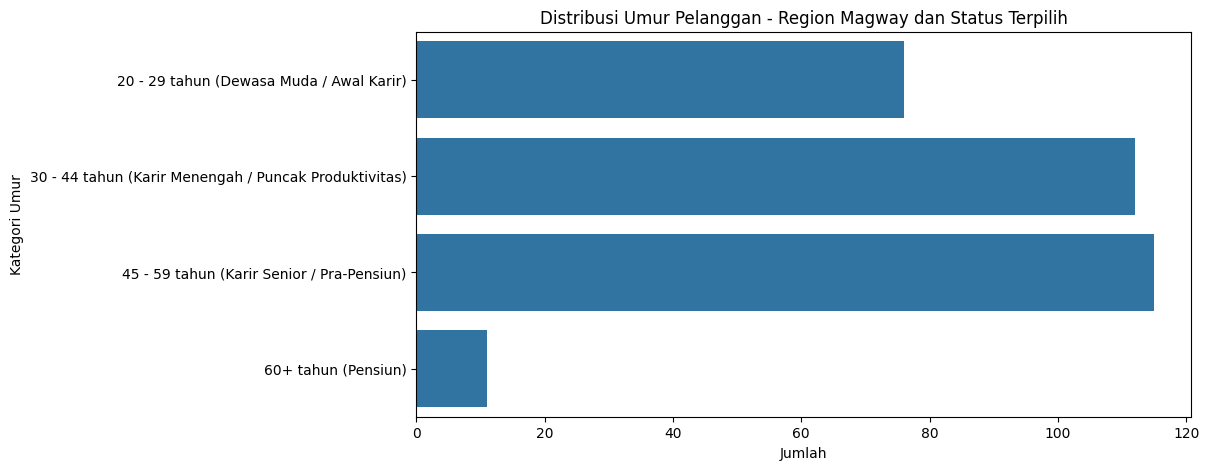

0       56
10      32
32      24
44      60
49      46
        ..
1965    23
1980    46
1983    26
1992    27
1999    37
Name: Age, Length: 326, dtype: int32

In [11]:
# 4. Profiling Berdasarkan Usia, Pekerjaan, Home Ownership, dan Purpose
# Menambahkan kolom umur
filtered_data['Age'] = pd.to_datetime(filtered_data['Issue Date']).dt.year - pd.to_datetime(filtered_data['DOB'], format='%d/%m/%Y').dt.year

# Membuat kategori umur
bins = [20, 30, 45, 60, float('inf')]
labels = ['20 - 29 tahun (Dewasa Muda / Awal Karir)', 
          '30 - 44 tahun (Karir Menengah / Puncak Produktivitas)', 
          '45 - 59 tahun (Karir Senior / Pra-Pensiun)', 
          '60+ tahun (Pensiun)']
filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)

# Mengurutkan kategori umur
age_order = ['20 - 29 tahun (Dewasa Muda / Awal Karir)', 
             '30 - 44 tahun (Karir Menengah / Puncak Produktivitas)', 
             '45 - 59 tahun (Karir Senior / Pra-Pensiun)', 
             '60+ tahun (Pensiun)']
filtered_data['Age Group'] = pd.Categorical(filtered_data['Age Group'], categories=age_order, ordered=True)

# Distribusi Umur
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_data, y='Age Group', order=age_order)
plt.title('Distribusi Umur Pelanggan - Region Magway dan Status Terpilih')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Umur')
plt.show()

filtered_data['Age']


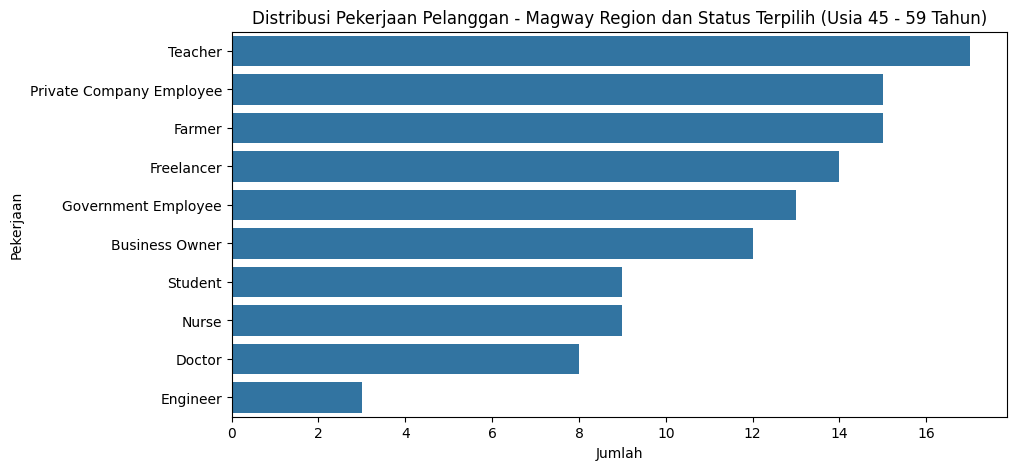

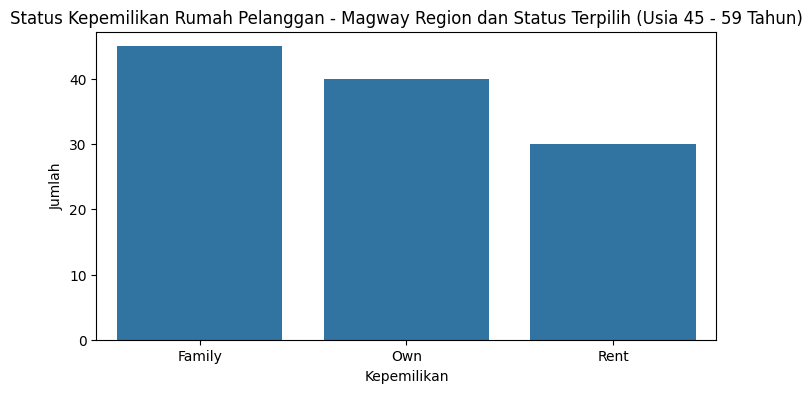

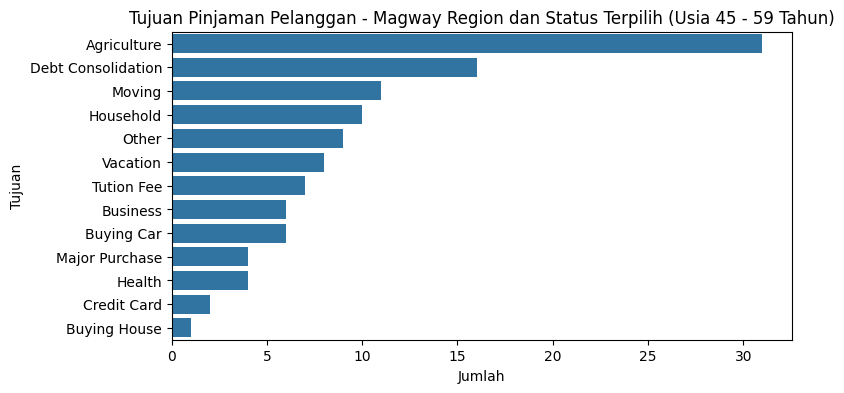

In [13]:
# Memfilter untuk usia 30-44 tahun
filtered_data = filtered_data[filtered_data['Age Group'] == '45 - 59 tahun (Karir Senior / Pra-Pensiun)']

# Analisis Pekerjaan
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_data, y='Occupation', order=filtered_data['Occupation'].value_counts().index)
plt.title('Distribusi Pekerjaan Pelanggan - Magway Region dan Status Terpilih (Usia 45 - 59 Tahun)')
plt.xlabel('Jumlah')
plt.ylabel('Pekerjaan')
plt.show()

# Status kepemilikan rumah
plt.figure(figsize=(8, 4))
sns.countplot(data=filtered_data, x='Home Ownership')
plt.title('Status Kepemilikan Rumah Pelanggan - Magway Region dan Status Terpilih (Usia 45 - 59 Tahun)')
plt.xlabel('Kepemilikan')
plt.ylabel('Jumlah')
plt.show()

# Purpose
plt.figure(figsize=(8, 4))
sns.countplot(data=filtered_data, y='Purpose', order=filtered_data['Purpose'].value_counts().index)
plt.title('Tujuan Pinjaman Pelanggan - Magway Region dan Status Terpilih (Usia 45 - 59 Tahun)')
plt.xlabel('Jumlah')
plt.ylabel('Tujuan')
plt.show()

Top 4 Occupation:
Occupation
Teacher                     17
Private Company Employee    15
Farmer                      15
Freelancer                  14
Name: count, dtype: int64


C:\Users\72531\AppData\Local\Temp\ipykernel_31984\101972072.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


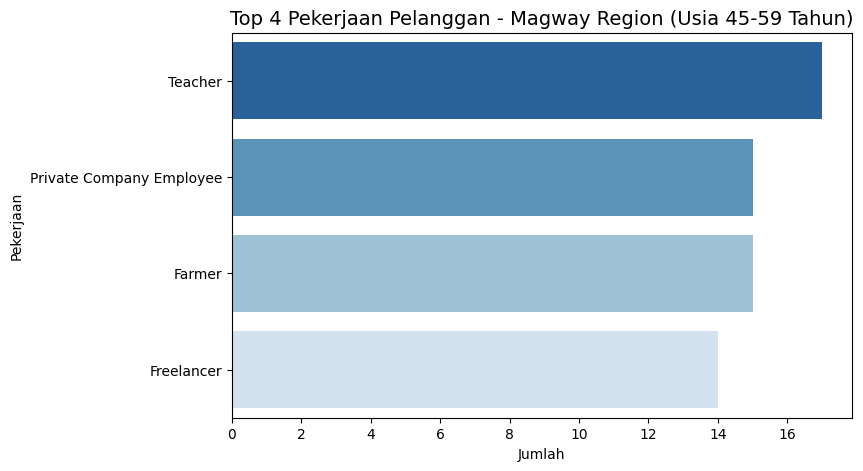

In [14]:
# Ambil Top 4 Occupation
top4_occupation = (
    filtered_data['Occupation']
    .value_counts()
    .head(4)
)

print("Top 4 Occupation:")
print(top4_occupation)

# Visualisasi Top 4 Occupation
plt.figure(figsize=(8,5))
sns.barplot(
    x=top4_occupation.values,
    y=top4_occupation.index,
    palette="Blues_r"
)
plt.title("Top 4 Pekerjaan Pelanggan - Magway Region (Usia 45-59 Tahun)", fontsize=14)
plt.xlabel("Jumlah")
plt.ylabel("Pekerjaan")
plt.show()


# Multivariate Analysis

Home Ownership untuk masing-masing Occupation (Top 4):
Home Ownership            Family  Own  Rent
Occupation                                 
Teacher                        3    5     9
Farmer                         7    8     0
Private Company Employee       4    5     6
Freelancer                     7    5     2


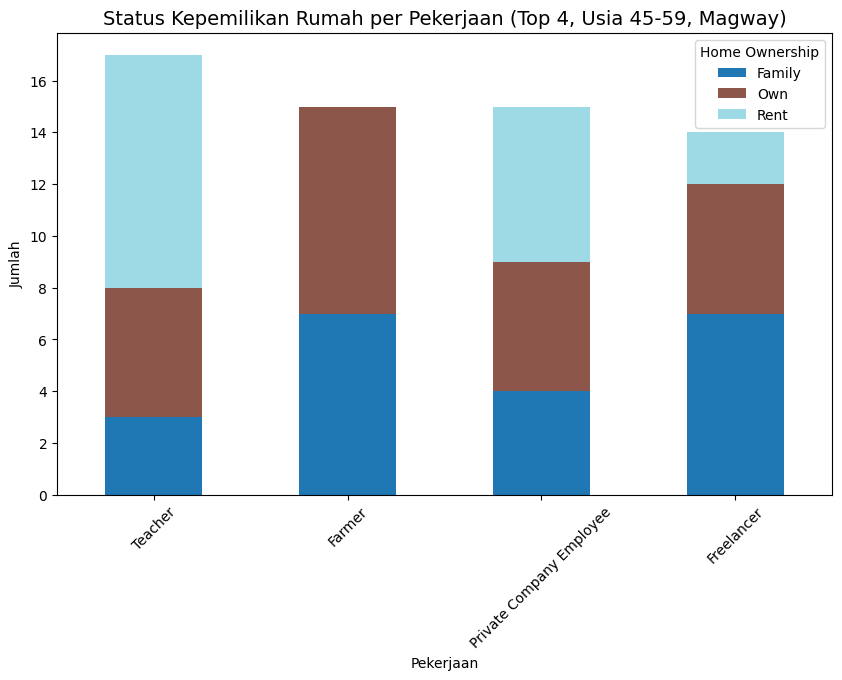

In [16]:
# Ambil top 4 occupation dulu
top4_occupation = filtered_data['Occupation'].value_counts().head(4).index

# Filter hanya untuk top 4
top4_data = filtered_data[filtered_data['Occupation'].isin(top4_occupation)]

# Buat tabulasi Occupation vs Home Ownership
ownership_by_occ = pd.crosstab(top4_data['Occupation'], top4_data['Home Ownership'])

# Urutkan berdasarkan total (descending)
ownership_by_occ = ownership_by_occ.loc[
    ownership_by_occ.sum(axis=1).sort_values(ascending=False).index
]

print("Home Ownership untuk masing-masing Occupation (Top 4):")
print(ownership_by_occ)

# Visualisasi stacked bar chart
ownership_by_occ.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)

plt.title("Status Kepemilikan Rumah per Pekerjaan (Top 4, Usia 45-59, Magway)", fontsize=14)
plt.xlabel("Pekerjaan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend(title="Home Ownership")
plt.show()


In [26]:
import pandas as pd

# 1) Ambil 4 occupation terbesar (berdasarkan jumlah baris di filtered_data)
top4_occ = filtered_data['Occupation'].value_counts().nlargest(4).index.tolist()

# 2) Filter ke hanya top 4 occupation
filtered_occ = filtered_data[filtered_data['Occupation'].isin(top4_occ)].copy()

# 3) Hitung kombinasi occupation-purpose
occ_purpose_counts = (
    filtered_occ
    .groupby(['Occupation', 'Purpose'], observed=True)
    .size()
    .reset_index(name='Count')
)

# 4) Untuk setiap occupation ambil top 4 purpose berdasarkan Count
top4_occ_purpose = (
    occ_purpose_counts
    .sort_values(['Occupation', 'Count'], ascending=[True, False])   # penting: sort by Count desc
    .groupby('Occupation', group_keys=False)
    .head(4)
    .reset_index(drop=True)
)

# 5) Tentukan urutan occupation berdasarkan total loan (descending)
occ_order = filtered_data['Occupation'].value_counts().loc[top4_occ].index.tolist()

# 6) Buat Occupation jadi categorical agar plotting/penampilan terurut
top4_occ_purpose['Occupation'] = pd.Categorical(
    top4_occ_purpose['Occupation'],
    categories=occ_order,
    ordered=True
)

# 7) Final sort: occupation sesuai occ_order, purpose di tiap occupation berdasarkan Count desc
top4_occ_purpose = top4_occ_purpose.sort_values(['Occupation','Count'], ascending=[True, False]).reset_index(drop=True)

# Tampilkan hasil
print(top4_occ_purpose)


                  Occupation             Purpose  Count
0                    Teacher         Agriculture      4
1                    Teacher              Moving      4
2                    Teacher            Business      3
3                    Teacher  Debt Consolidation      2
4   Private Company Employee         Agriculture      6
5   Private Company Employee           Household      2
6   Private Company Employee          Buying Car      1
7   Private Company Employee        Buying House      1
8                     Farmer          Tution Fee      3
9                     Farmer  Debt Consolidation      2
10                    Farmer           Household      2
11                    Farmer         Agriculture      1
12                Freelancer         Agriculture      8
13                Freelancer  Debt Consolidation      3
14                Freelancer          Tution Fee      2
15                Freelancer          Buying Car      1


d:\Technical Class\Python\myvenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Technical Class\Python\myvenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Technical Class\Python\myvenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Technical Class\Python\myvenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without as

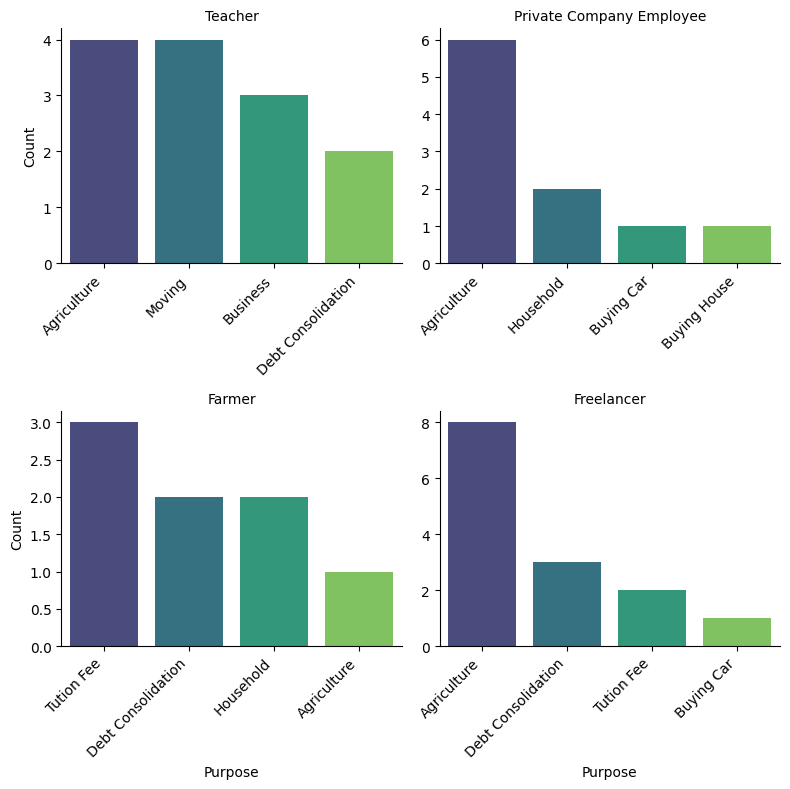

In [27]:
g = sns.FacetGrid(top4_occ_purpose, col="Occupation", col_wrap=2, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.barplot, x="Purpose", y="Count", order=None, palette="viridis")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


# JOIN TABLE ML-DATASET DENGAN LOAN CUSTOMER

In [18]:
df_cust = pd.read_excel('Loan-Cust.xlsx')
df_cust

,CustomerID,Name,NRC,DOB,Township Code,Occupation,Home Ownership,Avg Monthly Income
0,CF0078,Phoo Thandar,13/MAPANA(N)xxxxxx,1985-10-17,MMR0089,Business Owner,Family,3100000
1,CF6954,Nu Nu Kyi,5/DAHANA(N)xxxxxx,1983-06-28,MMR0127,Business Owner,Family,3200000
2,CF4653,Sett Sandar,2/DAMASA(N)xxxxxx,1982-11-21,MMR0132,Business Owner,Own,3200000
3,CF2040,Yati Myae,12/AHLANA(N)xxxxxx,1992-11-28,MMR0101,Business Owner,Family,3200000
4,CF0054,Khun Moe,4/MATANA(N)xxxxxx,1995-06-10,MMR0130,Business Owner,Own,3200000
...,...,...,...,...,...,...,...,...
1830,CF9496,Ye Maung,12/DALANA(N)xxxxxx,1969-01-27,MMR0005,Teacher,Rent,550000
1831,CF9542,Hnin Si Min Thant,11/AHMANA(N)xxxxxx,1988-05-14,MMR0028,Teacher,Rent,660000
1832,CF9743,Thitsar Thet,9/MAKHANA(N)xxxxxx,1972-03-28,MMR0088,Teacher,Rent,550000
1833,CF9791,Thura Paing,2/MASANA(N)xxxxxx,1996-06-05,MMR0005,Teacher,Family,440000


In [19]:
merge_df = pd.merge(top4_data, df_cust[['CustomerID', 'Avg Monthly Income']], on='CustomerID', how='left')
merge_df.columns

Index(['LoanID', 'CustomerID', 'DOB', 'Occupation', 'Home Ownership',
       'Township', 'Region', 'Issue Date', 'Expected End Date', 'Days Overdue',
       'Term Months', 'Current Term Months', 'Installment', 'Outstanding',
       'Loan Status', 'Loan Amount', 'Funded Amount', 'Interest Rate',
       'LoanType', 'Purpose', 'Age', 'Age Group', 'Avg Monthly Income'],
      dtype='object')

## Average Loan Amount di Top 4 Occupation di Magway

In [29]:
import matplotlib.ticker as mticker


C:\Users\72531\AppData\Local\Temp\ipykernel_31984\3619321166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_loan.values, y=avg_loan.index, palette="viridis")


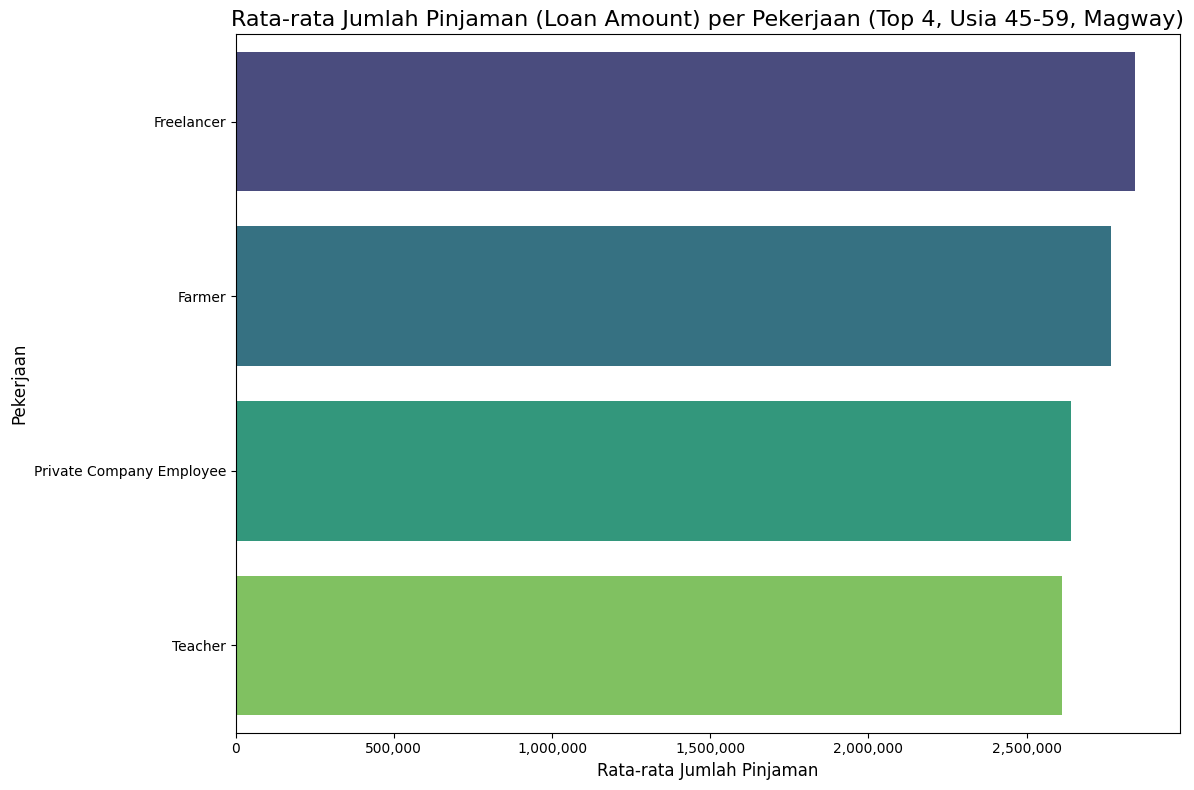

Occupation
Freelancer                  2.842857e+06
Farmer                      2.766667e+06
Private Company Employee    2.640000e+06
Teacher                     2.611765e+06
Name: Loan Amount, dtype: float64

In [33]:
avg_loan = merge_df.groupby('Occupation')['Loan Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_loan.values, y=avg_loan.index, palette="viridis")

plt.title('Rata-rata Jumlah Pinjaman (Loan Amount) per Pekerjaan (Top 4, Usia 45-59, Magway)', fontsize=16)
plt.xlabel('Rata-rata Jumlah Pinjaman', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)

# Format sumbu-x agar mudah dibaca (dengan pemisah ribuan)
formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('seaborn_avg_loan.png')
plt.show()

avg_loan

## Average Monthly Income di Top 4 Occupation di Magway

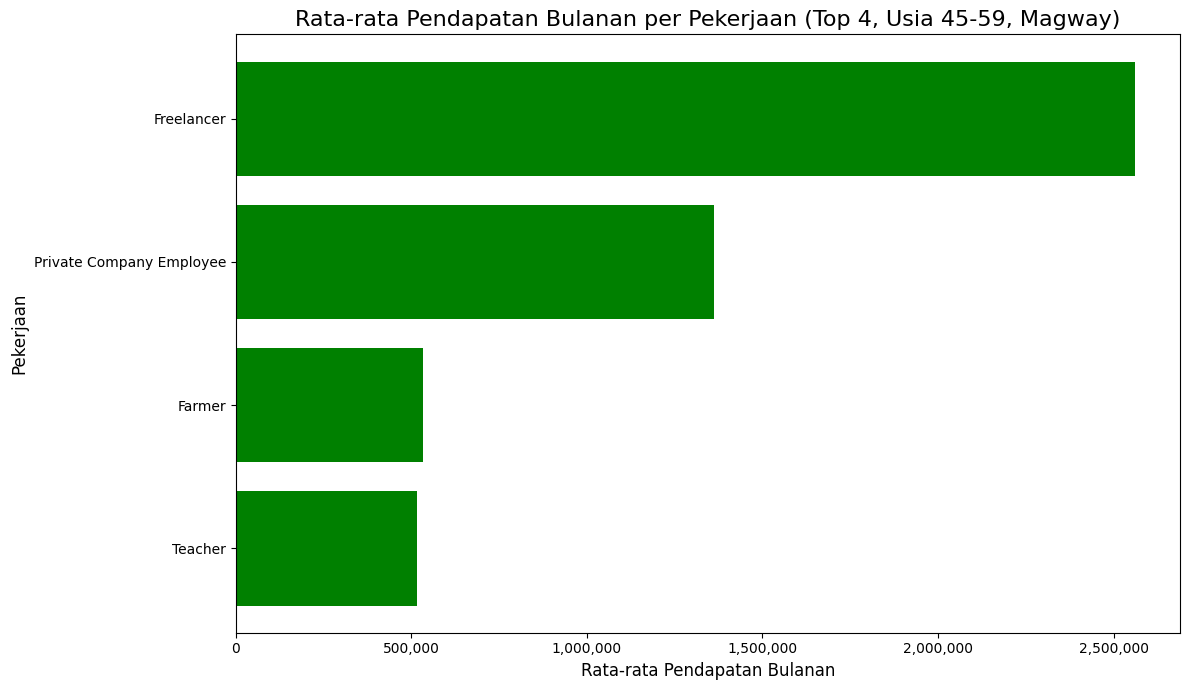

In [34]:
avg_income = merge_df.groupby('Occupation')['Avg Monthly Income'].mean().sort_values()
#
# Buat plot
plt.figure(figsize=(12, 7))
plt.barh(avg_income.index, avg_income.values, color='green')
plt.title('Rata-rata Pendapatan Bulanan per Pekerjaan (Top 4, Usia 45-59, Magway)', fontsize=16)
plt.xlabel('Rata-rata Pendapatan Bulanan', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)
# Format sumbu-x agar mudah dibaca (dengan pemisah ribuan)
formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('mpl_avg_income_by_occupation.png')
plt.show()

## Average Term Month di Top 4 Occupation di Magway

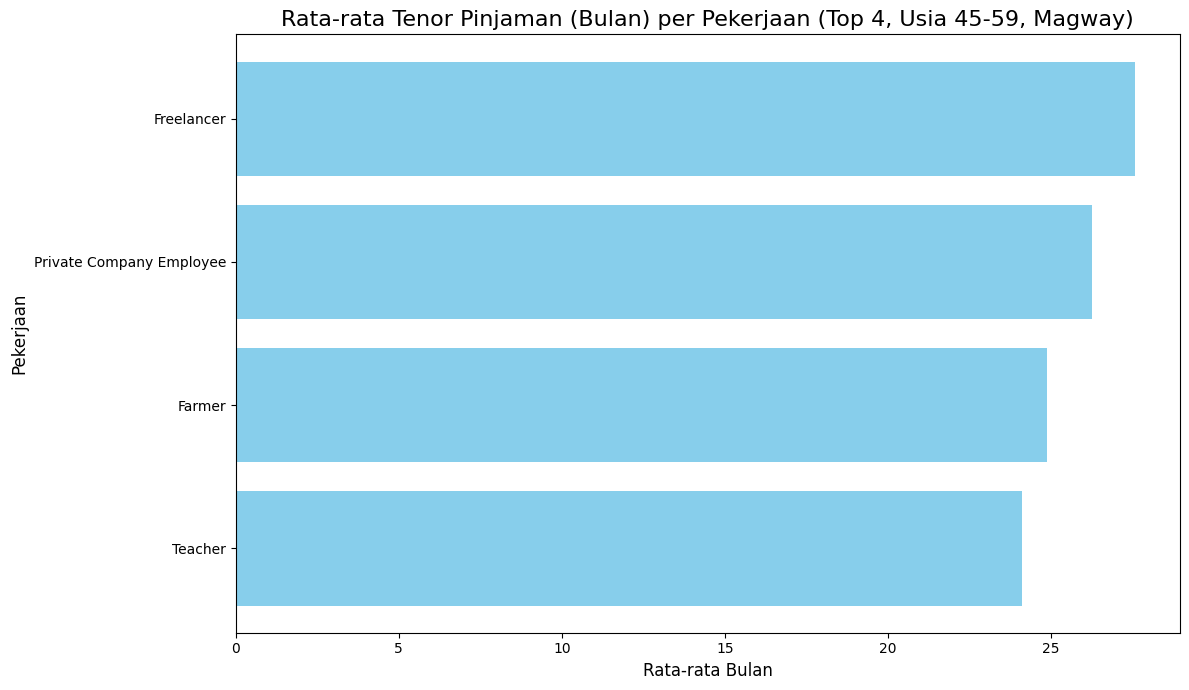

In [35]:
avg_term = merge_df.groupby('Occupation')['Term Months'].mean().sort_values()

    # Buat plot
plt.figure(figsize=(12, 7))
plt.barh(avg_term.index, avg_term.values, color='skyblue')
plt.title('Rata-rata Tenor Pinjaman (Bulan) per Pekerjaan (Top 4, Usia 45-59, Magway)', fontsize=16)
plt.xlabel('Rata-rata Bulan', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)
plt.tight_layout()
plt.savefig('mpl_avg_term_by_occupation.png')
plt.show()

## Average Interest Rate di Top 4 Occupation di Magway

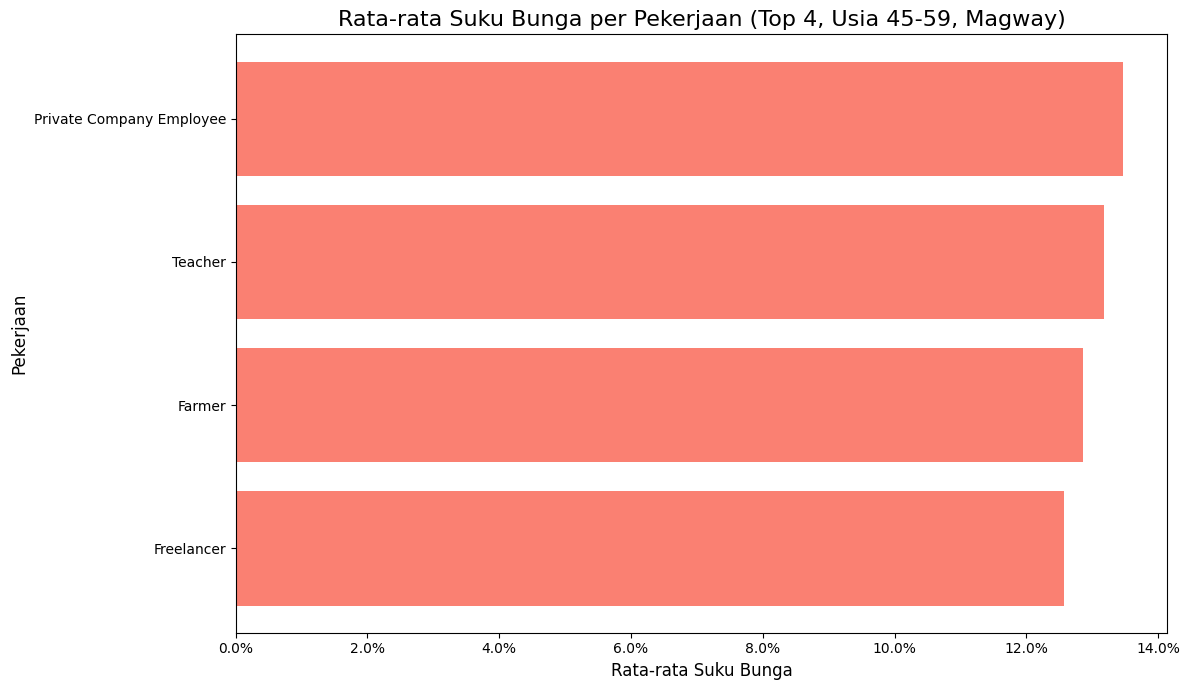

In [36]:
avg_rate = merge_df.groupby('Occupation')['Interest Rate'].mean().sort_values()

    # Buat plot
plt.figure(figsize=(12, 7))
plt.barh(avg_rate.index, avg_rate.values, color='salmon')
plt.title('Rata-rata Suku Bunga per Pekerjaan (Top 4, Usia 45-59, Magway)', fontsize=16)
plt.xlabel('Rata-rata Suku Bunga', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)

# Format sumbu-x sebagai persentase
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))

plt.tight_layout()
plt.savefig('mpl_avg_rate_by_occupation.png')
plt.show()

In [24]:
merge_df2 = pd.merge(df, df_cust[['CustomerID', 'Avg Monthly Income']], on='CustomerID', how='left')
merge_df2.columns

Index(['LoanID', 'CustomerID', 'DOB', 'Occupation', 'Home Ownership',
       'Township', 'Region', 'Issue Date', 'Expected End Date', 'Days Overdue',
       'Term Months', 'Current Term Months', 'Installment', 'Outstanding',
       'Loan Status', 'Loan Amount', 'Funded Amount', 'Interest Rate',
       'LoanType', 'Purpose', 'Avg Monthly Income'],
      dtype='object')

# ini cuma iseng doang

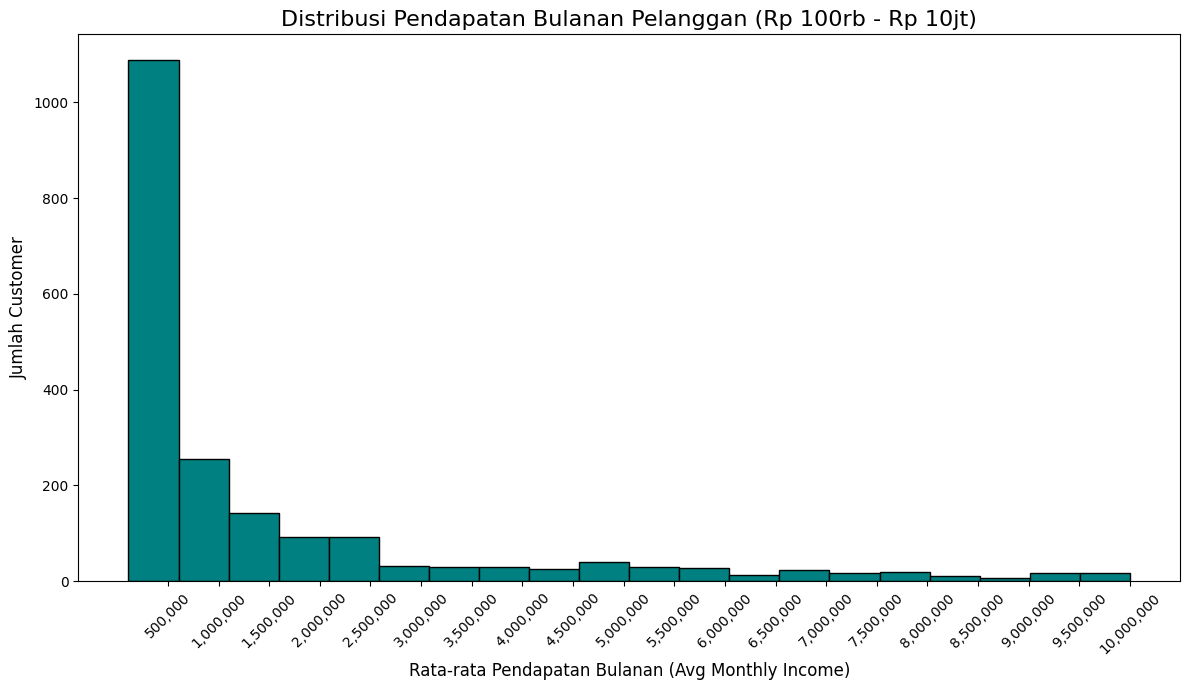

In [28]:
import matplotlib.ticker as mticker 

income_range_df = merge_df2[
        (merge_df2['Avg Monthly Income'] >= 100000) & 
        (merge_df2['Avg Monthly Income'] <= 10000000)
]
plt.figure(figsize=(12, 7))
        
        # Menggunakan plt.hist() untuk membuat histogram
plt.hist(income_range_df['Avg Monthly Income'], bins=20, color='teal', edgecolor='black')

# 3. Menambahkan judul dan label
plt.title('Distribusi Pendapatan Bulanan Pelanggan (Rp 100rb - Rp 10jt)', fontsize=16)
plt.xlabel('Rata-rata Pendapatan Bulanan (Avg Monthly Income)', fontsize=12)
plt.ylabel('Jumlah Customer', fontsize=12)

formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ','))

# 2. Terapkan formatter ke sumbu-x
plt.gca().xaxis.set_major_formatter(formatter)
# ---- AKHIR PERUBAHAN ----

# Format sumbu-x agar lebih mudah dibaca
ticks_interval = range(500000, 10000001, 500000)
plt.xticks(ticks=ticks_interval, rotation=45)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('income_distribution_histogram.png')
plt.show()